# Working with Dates and Times in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Importing the course packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Import the course datasets
rides = pd.read_csv('datasets/capital-onebike.csv')
with open('datasets/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)
florida_hurricane_dates = sorted(florida_hurricane_dates)

print(rides.head())
print(rides.columns)

# Convert 'start' and 'end' columns to datetime format
rides['Start date'] = pd.to_datetime(rides['Start date'])
rides['End date'] = pd.to_datetime(rides['End date'])

# Create a list of dictionaries with 'start' and 'end' keys
onebike_datetimes = rides.apply(lambda row: {'Start date': row['Start date'], 'End date': row['End date']}, axis=1).tolist()

# Convert specific columns to lists
selected_columns = ['Start date', 'End date']
onebike_datetime_strings = [rides[col].tolist() for col in selected_columns]
print(onebike_datetimes)


            Start date             End date  ...  Bike number Member type
0  2017-10-01 15:23:25  2017-10-01 15:26:26  ...       W20529      Member
1  2017-10-01 15:42:57  2017-10-01 17:49:59  ...       W20529      Casual
2  2017-10-02 06:37:10  2017-10-02 06:42:53  ...       W20529      Member
3  2017-10-02 08:56:45  2017-10-02 09:18:03  ...       W20529      Member
4  2017-10-02 18:23:48  2017-10-02 18:45:05  ...       W20529      Member

[5 rows x 8 columns]
Index(['Start date', 'End date', 'Start station number', 'Start station',
       'End station number', 'End station', 'Bike number', 'Member type'],
      dtype='object')
[{'Start date': Timestamp('2017-10-01 15:23:25'), 'End date': Timestamp('2017-10-01 15:26:26')}, {'Start date': Timestamp('2017-10-01 15:42:57'), 'End date': Timestamp('2017-10-01 17:49:59')}, {'Start date': Timestamp('2017-10-02 06:37:10'), 'End date': Timestamp('2017-10-02 06:42:53')}, {'Start date': Timestamp('2017-10-02 08:56:45'), 'End date': Timestamp('20

# CHAPTER 1: DATES AND CALENDARS
## CHAPTER 1.1: Dates in Python
Hi! My name is Max Shron, I will be your instructor for this course on working with dates and times in Python. Dates are everywhere in data science. Stock prices go up and down, experiments begin and end, people are born, politicians take votes, and on and on. All these events happen at a particular point in time. Knowing how to analyze data over time is a core data science skill.
### Course overview
This course is divided into four chapters. The first chapter will be about working with dates and calendars. In chapter two, we will add time into the mix, and combine dates and times. In chapter three, we'll tackle one of the toughest parts of working with time: time zones and Daylight Saving. And finally, in chapter four, we'll connect what we've learned about working with dates and times to explore how Pandas can make answering even complex questions about dates much easier.
### Dates in Python
Let's begin. Python has a special date class, called "date", which you will use to represent dates. A date, like a string, or a number, or a numpy array, has special rules for creating it and methods for working with it. In this lesson, we're going to discuss creating dates and extracting some basic information out of them.
### Why do we need a date class in Python?
Why do we need a special date class? Let's have a look. To understand how dates work, in this chapter you're going to be exploring 67 years of Hurricane landfalls in the US state of Florida. two_hurricanes is a list with the dates of two hurricanes represented as strings: the last 2016 hurricane (on October 7th, 2016) and the first 2017 hurricane (on June 21st, 2017). The dates are represented in the US style, with the month, then the day, then the year. Suppose you want to do something interesting with these dates. How would you figure out how many days had elapsed between them? How would you check that they were ordered from earliest to latest? How would you know which day of the week each was? Doing these things manually would be challenging, but Python makes all of them easy. By the end of this chapter, you'll know how to do each of these things yourself.
### Creating date objects
To create a date object, we start by importing the date class. The collection of date and time-related classes are stored in the "datetime" package. We create a date using the `date()` function. Here we've created dates corresponding to the two hurricanes, now as Python date objects. The inputs to `date()` are the year, month, and day. The first date is October 7, 2016, and the second date is June 21, 2017. The order is easy to remember: it goes from the biggest to smallest. Year, month, day. Later in this chapter, you'll create dates directly from lists of strings, but in this lesson, you're going to stick to creating dates by hand or using lists of already created dates.
### Attributes of a date
You can access individual components of a date using the date's attributes. You can access the year of the date using the year attribute, like so, and the result is 2016. Similarly, you can access the month and day using the month and day attributes like so.
### Finding the weekday of a date
You can also ask Python to do more complicated work. Here we call the `weekday()` method on the date, and see that the weekday is 4. What does 4 mean here? Python counts weekdays from 0, starting on Monday. 1 is Tuesday, 2 is Wednesday, and so on, up to 6 being a Sunday. This date was a Friday.

## Exercise 1.1
### Which day of the week?
Hurricane Andrew, which hit Florida on August 24, 1992, was one of the costliest and deadliest hurricanes in US history. Which day of the week did it make landfall?

Let's walk through all of the steps to figure this out.

### Instructions
- Import `date` from `datetime`.
- Create a `date` object for August 24, 1992.
- Now ask Python what day of the week Hurricane Andrew hit (remember that Python counts days of the week starting from Monday as 0, Tuesday as 1, and so on).

## Exercise 1.1.2
### How many hurricanes come early?
In this chapter, you will work with a list of the hurricanes that made landfall in Florida from 1950 to 2017. There were 235 in total. Check out the variable `florida_hurricane_dates`, which has all of these dates.

Atlantic hurricane season officially begins on June 1. How many hurricanes since 1950 have made landfall in Florida before the official start of hurricane season?

### Instructions
- Complete the `for` loop to iterate through `florida_hurricane_dates`.
- Complete the `if` statement to increment the counter (`early_hurricanes`) if the hurricane made landfall before June.


## Chapter 1.2: Math with Dates
In the last lesson, we discussed how to create date objects and access their attributes. In this lesson, we're going to talk about how to do math with dates: counting days between events, moving forward or backward by a number of days, putting them in order, and so on.
Let's take a step back. Think back to when you first learned arithmetic. You probably started with something like this: a number line. This one has the numbers 10 through 16 on it. A number line tells you what order the numbers go in, and how far apart numbers are from each other. Let's pick two numbers, 11 and 14, and represent them in Python as the variables a and b, respectively. We'll put them into a list, l. Python can tell us which number in this list is the least, using the `min()` function. `min` stands for the minimum. In this case, 11 is the lowest number in the list, so we get 11.
We can also subtract numbers. When you subtract two numbers, in this case subtracting 11 from 14, the result is 3. Said another way, if we took three steps from 11, we would get 14.
Now let's think about how this applies to dates. Let's call this line a calendar line, instead of a number line. Each dot on this calendar line corresponds to a particular day.
Let's put two dates onto this calendar line: November 5th, 2017, and December 4th, 2017. Let's represent this in Python. We start by importing the date class from the datetime package. We create two date objects: d1 is November 5th, 2017, and d2 is December 4th, 2017. As before, we put them into a list, l. What Python is doing under the hood, so to speak, is not that different from putting the dates onto a calendar line. For example, if we call min of l, we again get the "least" date, which means the earliest one. In this case, that's November 5th, 2017.
And just like numbers, we can subtract two dates. When we do this, we get an object of type "timedelta". Timedeltas give us the elapsed time between events. If you access the days attribute of this object, you can obtain the number of days between the two dates.
We can also use a timedelta in the other direction. First, let's import timedelta from datetime. Next, we create a 29-day timedelta, by passing days=29 to `timedelta()`. Now when we add td to our original date we get back December 4th, 2017. Python handled the fact that November has 30 days in it for us, without us having to remember which months are 30 day months, 31 day months, or 28 day months.

### Incrementing variables with +=
Finally a quick side note: we will use the "plus-equals" operation a number of times in the rest of the course, so we should discuss it. If you aren't familiar with it, you can see how it works here. On the left-hand side, we create a variable x, set it to zero. If we set x equal to x + 1, we increment x by 1. Similarly, on the right-hand side, we set x = 0, and then we increment it with x += 1. It has the same effect, and we'll use it all the time for counting.

## Exercise 1.2.1
### Subtracting dates
Python `date` objects let us treat calendar dates as something similar to numbers: we can compare them, sort them, add, and even subtract them. This lets us do math with dates in a way that would be a pain to do by hand.

The 2007 Florida hurricane season was one of the busiest on record, with 8 hurricanes in one year. The first one hit on May 9th, 2007, and the last one hit on December 13th, 2007. How many days elapsed between the first and last hurricane in 2007?

### Instructions
- Create a `date` object for May 9th, 2007, and assign it to the `start` variable.
- Create a `date` object for December 13th, 2007, and assign it to the `end` variable.
- Subtract `start` from `end`, to print the number of days in the resulting `timedelta` object.

## Exercise 1.2.2
### Counting events per calendar month
Hurricanes can make landfall in Florida throughout the year. As we've already discussed, some months are more hurricane-prone than others.

Using `florida_hurricane_dates`, let's see how hurricanes in Florida were distributed across months throughout the year.

We've created a dictionary called `hurricanes_each_month` to hold your counts and set the initial counts to zero. You will loop over the list of hurricanes, incrementing the correct month in `hurricanes_each_month` as you go, and then print the result.

### Instructions
- Within the `for` loop:
- Assign `month` to be the month of that hurricane.
- Increment `hurricanes_each_month` for the relevant month by 1.

## Exercise 1.2.3
### Putting a list of dates in order
Much like numbers and strings, `date` objects in Python can be put in order. Earlier dates come before later ones, and so we can sort a list of `date` objects from earliest to latest.

What if our Florida hurricane dates had been scrambled? We've gone ahead and shuffled them so they're in random order and saved the results as `dates_scrambled`. Your job is to put them back in chronological order, and then print the first and last dates from this sorted list.

### Instructions 
- Print the first and last dates in `dates_scrambled`.
- Sort `dates_scrambled` using Python's built-in `sorted()` function, and save the results to `dates_ordered`.
- Print the first and last dates in `dates_ordered`.


## Chapter 1.3: Turning dates into strings
Python has a very flexible set of tools for turning dates back into strings to be easily read. We want to put dates back into strings when, for example, we want to print results, but also if we want to put dates into filenames, or if we want to write dates out to CSV or Excel files.

### ISO 8601 format
For example, let's create a date and see how Python prints it by default. As before, we import date from datetime and let's again create an object for November 5th, 2017. When we ask Python to print the date, it prints the year, day and then the month, separated by dashes, and always with two digits for the day and month. In the comment, you can see I've noted this as YYYY-MM-DD; four digit year, two digit month, and two digit day of the month. This default format is also known as ISO format, or ISO 8601 format, after the international standard ISO 8601 that it is based on. ISO 8601 strings are always the same length since month and day are written with 0s when they are less than 10. We'll talk about another advantage of ISO 8601 in a moment. If we want the ISO representation of a date as a string, say to write it to a CSV file instead of just printing it, you can call the `isoformat()` method. In this example, we put it inside a list so you can see that it creates a string.
The ISO 8601 format has another nice advantage. To demonstrate, we've created a variable called some_dates and represented two dates here as strings: January 1, 2000, and December 31, 1999. Dates formatted as ISO 8601 strings sort correctly. When we print the sorted version of this list, the earlier day is first, and the later date is second. For example, if we use ISO 8601 dates in filenames, they can be correctly sorted from earliest to latest. If we had month or day first, the strings would not sort in chronological order.

### Every other format
If you don't want to put dates in ISO 8601 format, Python has a flexible set of options for representing dates in other ways, using the `strftime()` method.
`strftime()` works by letting you pass a "format string" which Python uses to format your date. Let's see an example. We again create an example date of January 5th, 2017. We then call `strftime()` on d, with the format string of % capital Y. Strftime reads the % capital Y and fills in the year in this string for us. `strftime()` though is very flexible: we can give it arbitrary strings with % capital Y in them for the format string, and it will stick the year in. For example, we can use the format string of "Year is %Y".
Strftime has other placeholders besides %Y: % lowercase m gives the month, and % lowercase d gives the day of the month. Using these, we can represent dates in arbitrary formats for whatever our needs are.

## Exercise 1.3.1
### Printing dates in a friendly format
Because people may want to see dates in many different formats, Python comes with very flexible functions for turning `date` objects into strings.

Let's see what event was recorded first in the Florida hurricane data set. In this exercise, you will format the earliest date in the `florida_hurricane_dates` list in two ways so you can decide which one you want to use: either the ISO standard or the typical US style.

### Instructions
- Assign the earliest date in `florida_hurricane_dates` to first_date.
- Print `first_date` in the ISO standard. For example, December 1st, 2000 would be "2000-12-01".
- Print `first_dat`e in the US style, using `.strftime()`. For example, December 1st, 2000 would be "12/1/2000".

## Exercise 1.3.2
### Representing dates in different ways
`date` objects in Python have a great number of ways they can be printed out as strings. In some cases, you want to know the date in a clear, language-agnostic format. In other cases, you want something which can fit into a paragraph and flow naturally.

Let's try printing out the same date, August 26, 1992 (the day that Hurricane Andrew made landfall in Florida), in a number of different ways, to practice using the `.strftime()` method.

A date object called `andrew` has already been created.

### Instructions
- Print `andrew` in the format 'YYYY-MM'.
- Print `andrew` in the format 'MONTH (YYYY)', using `%B` for the month's full name, which in this case will be August.
- Print `andrew` in the format 'YYYY-DDD' (where DDD is the day of the year) using `%j`.

_Add your notes here_

In [2]:
# Importing the course packages
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Import the course datasets
rides = pd.read_csv('datasets/capital-onebike.csv')
with open('datasets/florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)
florida_hurricane_dates = sorted(florida_hurricane_dates)

# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992,8,24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Shuffle the list
dates_scrambled = florida_hurricane_dates
random.shuffle(dates_scrambled)

# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

# Import date
from datetime import date

# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime("%Y-%m"))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime('%B (%Y)'))

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%j'))

0
10
218
1988-11-23
1964-08-27
1950-08-31
2017-10-29
ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950
1992-08
August (1992)


# CHAPTER 2: COMBINING DATES AND TIMES

## Chapter 2.1: Adding time to the mix

In this chapter, you are going to move from only working with dates to working with both dates and times: the calendar day AND the time on the clock within that day.

### Dates and Times

As always, let's start with an example. Here is an example of a date and a time together: October 1, 2017, at 3:23:25 PM. Unlike before, where we were only working with the date, we're now going to also include the time. Let's see how to represent this in Python.
The first thing we have to do is import the datetime class from the datetime package. Ideally, these would have different names, but unfortunately for historical reasons they have the same name. This is just something to get used to.
We're going to create a datetime called "dt" and populate the fields together. The first three arguments to the datetime class are exactly the same as the date class. Year, then month, then day, each as a number.
Next, we fill in the hour. Computers generally use 24 hour time, meaning that 3 PM is represented as hour 15 of 24.
We put in the minutes, 23 out of 60. And finally, the seconds. October 1, 2017 at 3:23:25PM is represented as a datetime in Python as 2017, 10, 1, 15, 23, 25). All of these arguments need to be whole numbers; if you want to represent point-5 seconds, you can add microseconds to your datetime. Here we've added 500,000 microseconds, or point-5 seconds. That is, Python breaks seconds down into millionths of a second for you when you need that kind of precision. If you need billionths of a second precision (which happens sometimes in science and finance) we'll cover nanoseconds when we get to Pandas at the end of this course. Python defaults to 0 microseconds if you don't include it.
That's a lot of arguments; if it helps, you can always be more explicit and use named arguments.

### Replacing parts of a datetime

We can also make new datetimes from existing ones by using the `replace()` method. For example, we can take the datetime we just made, and make a new one which has the same date but is rounded down to the start of the hour. We call `dt.replace()` and set minutes, seconds, and microseconds to 0. This creates a new datetime with the same values in all the other fields, but these ones changed.

### Capital Bikeshare

Before we wrap up, let's talk about the data we will use for the rest of this course. You will be working with data from Capital Bikeshare, the oldest municipal shared bike program in the United States. Throughout the Washington, DC area, you will find these special bike docks, where riders can pay to take a bike, ride it, and return to this or any other station in the network. We will be following one bike, ID number "W20529", on all the trips it took in October, November, and December of 2017. Each trip consisted of a date and time when a bike was undocked from a station, then some time passed, and the date and time when W20529 was docked again.

## Exercise 2.1.1

### Creating datetimes by hand

Often you create `datetime` objects based on outside data. Sometimes though, you want to create a `datetime` object from scratch.

You're going to create a few different `datetime` objects from scratch to get the hang of that process. These come from the bikeshare data set that you'll use throughout the rest of the chapter.

### Instructions

- Import the `datetime` class.
  + Create a `datetime` for October 1, 2017 at 15:26:26.
  + Print the results in ISO format.
  + Create a `datetime` for December 31, 2017 at 15:19:13.
  + Print the results in ISO format.
- Create a new datetime by replacing the year in dt with 1917 (instead of 2017)

## Exercise 2.1.2

### Counting events before and after noon

In this chapter, you will be working with a list of all bike trips for one Capital Bikeshare bike, W20529, from October 1, 2017 to December 31, 2017. This list has been loaded as `onebike_datetimes`.

Each element of the list is a dictionary with two entries: `Start date` is a `datetime` object corresponding to the start of a trip (when a bike is removed from the dock) and `End date` is a `datetime` object corresponding to the end of a trip (when a bike is put back into a dock).

You can use this data set to understand better how this bike was used. Did more trips start before noon or after noon?

### Instructions

- Within the `for` loop, complete the `if` statement to check if the trip started before noon.
- Within the `for` loop, increment `trip_counts['AM']` if the trip started before noon, and `trip_counts['PM']` if it started after noon.


## Chapter 2.2: Printing and parsing datetimes

Much like dates, datetimes can be printed in many ways. Python also has another trick: you can take a string and turn it directly into a datetime. Let's start with printing dates and then move on to asking Python to parse them.

### Printing datetimes
First, let's create a datetime again. dt corresponds to December 30, 2017 at 15:19:13, the end of the last trip that W20529 takes in our data set. Just like with date objects, we use `strftime()` to create a string with a particular format. First, we'll just print the year, month and date, using the same format codes we used for dates. % capital Y stands for the four digit year, % lowercase m for the month, and % lowercase d for the day of the month. Now we can add in the hours, minutes and seconds. Again, we print the year, month and day, and now we add three more format codes: % capital H gives us the hour, % capital M gives us the minute, and % capital S gives us the seconds. There are also format codes for 12-hour clocks, and for printing the correct AM or PM.
As before, we can make these formatting strings as complicated as we need. Here's another version of the previous string.

### ISO 8601 Format

Finally, we can use the `isoformat()` method, just like with dates, to get a standards-compliant way of writing down a datetime. The officially correct way of writing a datetime is the year, month, day, then a capital T, then the time in 24 hour time, followed by the minute and second. When in doubt, this is a good format to use.

### Parsing datetimes with strptime

We can also parse dates from strings, using the same format codes we used for printing. You'll use this often when getting date and time data from the Internet since dates and times are often represented as strings. We start, as before, by importing the datetime class.
The method we're going to use is called `strptime()`, which is short for string parse time. `strptime()` takes two arguments: the first argument is the string to turn into a datetime, and the second argument is the format string that says how to do it.
First we pass the string we want to parse. In this case, a string representing December 30, 2017, at 15:19:13.
Then we pass the format string, which as mentioned before uses the same format codes we used with `strftime()`. In this case, first the month, then the day, then the year, all separated by slashes, then a space, and then the hour, minutes, and seconds separated by colons. You usually need to figure this out once per data set.
If we look and see what kind of object we've made, by printing the type of `dt`, we see that we've got a datetime. And if we print that datetime, we get a string representation of the datetime. We can see that the parsing worked correctly. We need an exact match to do a string conversion. For example, if we leave out how to parse the time, Python will throw an error. And similarly, if there is an errant comma or other symbols, `strptime()` will not be happy.

### Parsing datetimes with Python

Finally, there is another kind of datetime you will sometimes encounter: the Unix timestamp. Many computers store datetime information behind the scenes as the number of seconds since January 1, 1970. This date is largely considered the birth of modern-style computers. To read a Unix timestamp, use the `datetime.fromtimestamp()` method. Python will read your timestamp and return a datetime.

## Exercise 2.2.1

### Turning strings into datetimes

When you download data from the Internet, dates and times usually come to you as strings. Often the first step is to turn those strings into `datetime` objects.

In this exercise, you will practice this transformation.

|**Reference**|                        |
|-------------|------------------------|
|%Y           |4 digit year (0000-9999)|
|%m           |2 digit month (1-12)    |
|%d           |2 digit day (1-31)      |
|%H           |2 digit hour (0-23)     |
|%M           |2 digit minute (0-59)   |
|%S           |2 digit second (0-59)   |

### Instructions 

- Determine the format needed to convert `s` to datetime and assign it to `fmt`.
  + Convert the string s to datetime using fmt.
- Determine the format needed to convert `s1` to datetime and assign it to `fmt1`.
  + Convert the string `s1` to datetime using `fmt1`.
- Determine the format needed to convert `s2` to datetime and assign it to `fmt2`.
  + Convert the string `s2` to datetime using `fmt2`
  
## Exercise 2.2.2

### Parsing pairs of strings as datetimes 

Up until now, you've been working with a pre-processed list of datetimes for W20529's trips. For this exercise, you're going to go one step back in the data cleaning pipeline and work with the strings that the data started as.

Explore `onebike_datetime_strings` in the IPython shell to determine the correct format.

### Instructions

- Outside the `for` loop, fill out the `fmt` string with the correct parsing format for the data.
- Within the `for` loop, parse the `start` and `end` strings into the `trip` dictionary with `Start date` and `End date` keys and `datetime` objects for values.

## Exercise 2.2.3

### Recreating ISO format with strftime()

In the last chapter, you used `strftime()` to create strings from `date` objects. Now that you know about `datetime` objects, let's practice doing something similar.

Re-create the `.isoformat()` method, using `.strftime()`, and print the first trip start in our data set.

### Instructions

- Complete `fmt` to match the format of ISO 8601.
- Print `first_start` with both `.isoformat()` and `.strftime()`; they should match.

## Exercise 2.2.4

### Unix timestamps

Datetimes are sometimes stored as Unix timestamps: the number of seconds since January 1, 1970. This is especially common with computer infrastructure, like the log files that websites keep when they get visitors.

### Instructions

- Complete the `for` loop to loop over `timestamps`.
- Complete the code to turn each timestamp `ts` into a `datetime`.

## Chapter 2.3: Working with durations

Much like dates, datetimes have a kind of arithmetic; we can compare them, subtract them, and add intervals to them. Because we are working with both days and times, the logic for durations is a little more complicated, but not by much. Let's have a look.
Just as with dates, to get a sense for what's going on we put our datetimes on a timeline. These two datetimes here correspond to the start and end of one ride in our data set.
To follow along in Python, we'll load these two in as "start" and "end". When we subtract datetimes, we get a timedelta. A timedelta represents what is called a duration: the elapsed time between events.
When we call the method `total_seconds()`, we get back the number of seconds that our timedelta represents. In this case, 1450 seconds elapsed between our start and end. 1450 seconds is 24 minutes and 10 seconds.

### Creating timedeltas

You can also create a timedelta by hand. You start by importing timedelta from datetime. To create a timedelta, you specify the amount of time which has elapsed. For example, we make delta1, a timedelta which corresponds to a one second duration.
Now when we add delta1 to start, we see that we get back a datetime which is one second later.
We also create a timedelta, delta2, which is one day and one second in duration. Now when we add it to start, we get a new datetime which is the next day and one second later. Timedeltas can be created with any number of weeks, days, minutes, hours, seconds, or microseconds, and can be as small as a microsecond or as large as 2-point-7 million years.

### Negative timedeltas

Timedeltas can also be negative. For example, if we create delta3, whose argument is -1 weeks, and we add it to start we get a datetime corresponding to one week earlier.
We can also subtract a positive timedelta and get the same result. We create delta4, which corresponds to a 1 week duration, and we subtract it from start. As you can see, we get the same answer as when we added a negative timedelta.


## Exercise 2.3.1

### Turning pairs of datetimes into durations

When working with timestamps, we often want to know how much time has elapsed between events. Thankfully, we can use `datetime` arithmetic to ask Python to do the heavy lifting for us so we don't need to worry about day, month, or year boundaries. Let's calculate the number of seconds that the bike was out of the dock for each trip.

Continuing our work from a previous coding exercise, the bike trip data has been loaded as the list `onebike_datetimes`. Each element of the list consists of two datetime objects, corresponding to the `start` and `end` of a trip, respectively.

### Instructions

- Within the loop:
  + Use arithmetic on the `start` and `end` elements to find the length of the trip
  + Save the results to `trip_duration`.
  + Calculate `trip_length_seconds` from `trip_duration`.

## Exercise 2.3.2

### Average trip time

W20529 took 291 trips in our data set. How long were the trips on average? We can use the built-in Python functions `sum()` and `len()` to make this calculation.

Based on your last coding exercise, the data has been loaded as `onebike_durations`. Each entry is a number of seconds that the bike was out of the dock.

### Instructions

- Calculate `total_elapsed_time` across all trips in `onebike_durations`.
- Calculate `number_of_trips` for `onebike_durations`.
- Divide `total_elapsed_time` by `number_of_trips` to get the `average trip length`.

## Exercise 2.3.3

### The long and the short of why time is hard
Out of 291 trips taken by W20529, how long was the longest? How short was the shortest? Does anything look fishy?

### Instructions

- Calculate `shortest_trip` from `onebike_durations`.
- Calculate `longest_trip` from `onebike_durations`.
- Print the results, turning `shortest_trip` and `longest_trip` into strings so they can print.

In [4]:
# Importing the course packages
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Import the course datasets
rides = pd.read_csv('datasets/capital-onebike.csv')

# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

# Create a datetime object
dt1 = datetime(2017, 12, 31, 15, 19, 13)

# Print the results in ISO 8601 format
print(dt1.isoformat())

# Replace the year with 1917
dt_old = dt1.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

# Convert 'start' and 'end' columns to datetime format
rides['Start date'] = pd.to_datetime(rides['Start date'])
rides['End date'] = pd.to_datetime(rides['End date'])

# Create a list of dictionaries with 'start' and 'end' keys
onebike_datetimes = rides.apply(lambda row: {'Start date': row['Start date'], 'End date': row['End date']}, axis=1).tolist()

# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['Start date'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

# It looks like this bike is used about twice as much after noon than it is before noon. One obvious follow up would be to see _which_ hours the bike is most likely to be taken out for a ride.

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

# Starting string, in YYYY-MM-DD format
s1 = '2030-10-15'

# Write a format string to parse s
fmt1 = '%Y-%m-%d'

# Create a datetime object d
d1 = datetime.strptime(s1, fmt1)

# Print d
print(d1)

# Starting string, in MM/DD/YYYY HH:MM:SS format
s2 = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt2 = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d2 = datetime.strptime(s2, fmt2)

# Print d
print(d2)

# Convert specific columns to lists
selected_columns = ['Start date', 'End date']
onebike_datetime_strings = list(zip(rides['Start date'].astype(str), rides['End date'].astype(str)))

# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for start, end in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)
    
# Many complex data cleaning tasks follow this same format: start with a list, process each element, and add the processed data to a new list.

# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)

# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

2017-10-01T15:26:26
2017-12-31T15:19:13
1917-12-31 15:19:13
{'AM': 94, 'PM': 196}
2017-02-03 00:00:01
2030-10-15 00:00:00
1986-12-15 08:00:00
2017-10-01T15:23:25
2017-10-01T15:23:25
[datetime.datetime(2017, 12, 30, 20, 19, 13), datetime.datetime(2017, 12, 30, 20, 9, 3)]
1178.9310344827586
The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds
2017-10-01T15:26:26+00:00
2017-10-01T15:26:26-08:00
2017-10-01T15:26:26+11:00
Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Origi

# CHAPTER 3: TIME ZONES AND DAYLIGHT SAVING

## Chapter 3.1: UTC offsets

Sometimes, you really need to know exactly when something happened. Up until now, the datetime objects you have worked with are what is called "naive", and can't be compared across different parts of the world. They don't know anything about their time zone.

### Time zones

Why does this matter? Before time zones, each town or city set its clock so that noon was directly overhead.
Another city 100 miles away would also set their clocks to be noon when the sun was overhead.
But this meant that these two cities had clocks that were different, by maybe 15 or 20 minutes. When people moved by foot or horseback, this wasn't a problem.
Then railroads, and later telegraphs, came into existence. Now you could move or communicate with someone 100 or even 1000 miles away fast enough that time had to be consistent.
Governments solved this problem by declaring that all clocks within a wide area would agree on the hour, even if some were ahead or behind of their solar time. The United States, for example, has 4 major time zones, plus one for Alaska and another for Hawaii. Our bike data was collected in Washington, DC, which observes Eastern time.

### UTC

But since we're not using the sun anymore, how do we know how to set the clock? Because the United Kingdom was the first to standardize its time, everyone in the world sets their clocks relative to the original historical UK standard. This standard time is called UTC. Because all clocks are set relative to UTC, we can compare time around the world. Generally, clocks west of the UK are set earlier than UTC, and clocks east of the UK are set later than UTC. For example, the eastern United States is typically UTC minus 5 hours, while India is typically UTC plus 5 hours 30 minutes.
Let's see this in code. As before, you import datetime and timedelta. Now you also import timezone. This will let you specify what timezone the clock was in when our data was recorded.
We create a timezone object, which accepts a timedelta that explains how to translate your datetime into UTC. In this case, since the clock that measured our bicycle data set was five hours behind UTC, we create ET to be at UTC-5. We can specify what time zone the clock was in when the last ride started in our data set. The clock that recorded the ride was 5 hours behind UTC. Now if you print it, your datetime includes the UTC offset.
Making a datetime "aware" of its timezone means you can ask Python new questions. For example, suppose you want to know what the date and time would have been if the clock had been set to India Standard Time instead. First, create a new timezone object set to UTC plus 5 hours 30 minutes. Now use the `astimezone()` method to ask Python to create a new datetime object corresponding to the same moment, but adjusted to a different time zone. In this case, because clocks in India would have been set 10-point-5 hours ahead of clocks on the eastern US, the last ride would have taken place on December 31, at 1 hour, 39 minutes, and 3 seconds past midnight local time. Same moment, different clock.

### Adjusting timezone vs changing tzinfo

Finally, there is an important difference between adjusting timezones and changing the `tzinfo` directly. You can set the `tzinfo` directly, using the `replace()` method. Here we've set the `tzinfo` to be `timezone.utc`, a convenient object with zero UTC offset. The clock stays the same, but the UTC offset has shifted. Or, just like before, you can call the `astimezone()` method. Now if we adjust into UTC with astimezone(`timezone.utc`), we change both the UTC offset and the clock itself.


## Exercise 3.1.1

### Creating timezone aware datetimes

In this exercise, you will practice setting timezones manually.

### Instructions 

- Import `timezone`.
  + Set the `tzinfo` to `UTC`, without using `timedelta`.
- Set `pst` to be a timezone set for UTC-8.
  + Set `dt1`'s timezone to be `pst`.
- Set `aedt` to be a timezone set for UTC+11.
  + Set `dt2`'s timezone to be `aedt`.

## Exercise 3.1.2

### Setting timezones

Now that you have the hang of setting timezones one at a time, let's look at setting them for the first ten trips that W20529 took.

Make the change using `.replace()`

### Instructions

- Create `edt`, a `timezone` object whose UTC offset is -4 hours.
- Within the `for` loop:
- Set the `tzinfo` for `trip['start']`.
- Set the `tzinfo` for `trip['end']`.

## Exercise 3.1.3

### What time did the bike leave in UTC?

Having set the timezone for the first ten rides that W20529 took, let's see what time the bike left in UTC. 

### Instructions

- Within the `for` loop, move `dt` to be in UTC. Use `timezone.utc` as a convenient shortcut for UTC.


## Chapter 3.2: Time zone database

Now that you understand how UTC offsets work, it's time to talk about how you use timezones in practice.
This is a picture of all of the different time zones in the world, as of 2017. They cut across countries, and within countries, and sometimes one is even totally surrounded by another one. How could you possibly know all of these when you need to align your data to UTC? Do you need to look up the offset for each one in some big spreadsheet somewhere? Can't a computer help with this?
Thankfully, yes. There is a database called tz, updated 3-4 times a year as timezone rules change. This database is used by computer programs across many programming languages. Because timezone information changes so quickly, it doesn't make sense to bundle it directly into Python. Instead, you will use a package called `dateutil`.
Let's start by making a `timezone` object that corresponds to the eastern United States, where our bicycle data comes from. Within tz, time zones are defined first by the continent they are on, and then by the nearest major city. For example, the time zone used on the eastern seaboard of the United States is 'America/New York'. We fetch this `timezone` by calling `tz.gettz()`, and passing 'America/New York' as the string.
Here are a few more examples: 'America/Mexico_City'. 'Europe/London'. 'Africa/Accra'.
Let's look at our last ride again. Instead of specifying the UTC offset yourself, you pass the timezone you got from tz. Look at the result, and you can see that it's got the right UTC offset.
Even more excitingly, this same object will adjust the UTC offset depending on the date and time. If we call `datetime()` with the time of our first ride, and pass in the same timezone info, we see that it gives us a different UTC offset. We will discuss daylight savings time in the next lesson, but suffice to say that in some places the clocks change twice a year. Instead of having to look up when these things change, we just ask the timezone database to know for us. tz includes rules for UTC offsets going all the way back to the late 1960s, and sometimes earlier. If you have data stretching over a long period of time, and you really care about getting the exact hours and minutes correct, you can use tz to put all of your date and timestamps on to a common scale.

## Exercise 3.2.1

### Putting the bike trips into the right time zone

Instead of setting the timezones for W20529 by hand, let's assign them to their IANA timezone: 'America/New_York'. Since we know their political jurisdiction, we don't need to look up their UTC offset. Python will do that for us.

### Instructions

- Import `tz` from `dateutil`.
- Assign `et` to be the timezone `'America/New_York'`.
- Within the `for` loop, set `start` and `end` to have `et` as their timezone (use `.replace()`).

## Exercise 3.2.2

### What time did the bike leave? (Global edition)

When you need to move a datetime from one `timezone` into another, use `.astimezone()` and `tz`. Often you will be moving things into UTC, but for fun let's try moving things from 'America/New_York' into a few different time zones.

### Instructions 

- Set `uk` to be the timezone for the UK: 'Europe/London'.
  + Change `local` to be in the `uk` timezone and assign it to `notlocal`.
- Set `ist` to be the timezone for India: 'Asia/Kolkata'.
  + Change `local` to be in the `ist` timezone and assign it to `notlocal`.
- Set `sm` to be the timezone for Samoa: 'Pacific/Apia'.
  + Change `local` to be in the `sm` timezone and assign it to `notlocal`.


### Chapter 3.3: Starting Daylight Saving Time

Some places change their clocks twice a year to create longer summer evenings. This practice is called daylight saving time, but it would better be called daylight shifting time. In some countries it is called "summer time". Dealing with daylight saving time can be one of the most fiendish challenges in dealing with dates and times. To keep things simple, let's start with the situation where the clocks move forward in the spring. In the next lesson, we'll discuss handling the opposite case, when the clocks move back in the fall.
Let's look at an example. On March 12, 2017, in Washington, DC, the clock jumped straight from 1:59 am to 3 am. The clock "springs forward". It never officially struck 2 am anywhere on the East Coast of the United States that day.
Just like before, to make our clock in Washington, DC comparable to clocks in other places, we need to represent it with a UTC offset. Only now the UTC offset is going to change. On this date, at 1 AM in Washington, DC, we were in Eastern Standard Time. It was 6 AM UTC, a five-hour difference. At 3 AM in Washington, DC, we were in Eastern Daylight Time. It was 7 AM UTC, a four-hour difference.
Let's see the same thing in code. To be as clear as possible, let's create the UTC offsets by hand for now instead of using `dateutil.tz`	. We start by creating a datetime object, spring_ahead_159am, for March 12th, at 1:59:59, without any `timezone` information. We print the results out with `isoformat()` to check that we have the time right, and we make another object for spring_ahead_3am. We subtract the two `datetime` objects and ask how much time has elapsed by calling `total_seconds()`. As expected, they're an hour and one second apart.
As before, to fix problems with comparing datetimes we start by creating timezone objects. We define Eastern Standard Time, or EST, using the `timezone` constructor. We set the offset to -5 hours. Similarly, we define Eastern Daylight Time, or EDT, with an offset of -4 hours.
We assign our first timestamp, at 1:59 am to be in EST. When we call `isoformat()`, we see it has the correct offset. We assign our second timestamp, at 3:00 am, to be in EDT, and again check the output with `isoformat()`. When we subtract the two datetime objects, we see correctly that one second has elapsed. Putting things in terms of UTC once again allowed us to make proper comparisons.
But how do we know when the cutoff is without looking it up ourselves? `dateuti`l to the rescue again. Just like before when it saved us from having to define `timezones` by hand, `dateutil` saves us from having to know daylight savings rules. We create a `timezone` object by calling `tz.gettz()` and pass our timezone description string. Recall that since Washington, DC is in the America/New_York time zone, that's what we use. Once again we create a datetime corresponding to 1:59 am on the day that the east coast of the US springs forward. This time though, we set the tzinfo to eastern time. Similarly, we create a datetime set to 3 am on March 12th, and when we set tzinfo to be eastern time, `dateutil` figures out for us that it should be in EDT.

## Exercise 3.3.1

### How many hours elapsed around daylight saving?

Since our bike data takes place in the fall, you'll have to do something else to learn about the start of daylight savings time.

Let's look at March 12, 2017, in the Eastern United States, when Daylight Saving kicked in at 2 AM.

If you create a `datetime` for midnight that night, and add 6 hours to it, how much time will have elapsed?

### Instructions 

- You already have a `datetime` called `start`, set for March 12, 2017 at midnight, set to the timezone `'America/New_York'`.

Add six hours to `start` and assign it to `end`. Look at the UTC offset for the two results.

- You added 6 hours, and got 6 AM, despite the fact that the clocks springing forward means only 5 hours would have actually elapsed!

Calculate the time between `start` and `end`. How much time does Python think has elapsed?

- Move your `datetime` objects into UTC and calculate the elapsed time again.

Once you're in UTC, what result do you get?

## Exercise 3.3.2

### March 29, throughout a decade

Daylight Saving rules are complicated: they're different in different places, they change over time, and they usually start on a Sunday (and so they move around the calendar).

For example, in the United Kingdom, as of the time this lesson was written, Daylight Saving begins on the last Sunday in March. Let's look at the UTC offset for March 29, at midnight, for the years 2000 to 2010.

### Instructions

- Using `tz`, set the timezone for dt to be `'Europe/London'`.
- Within the `for` loop:
- Use the `.replace()` method to change the year for `dt4` to be `y`.
- Call `.isoformat()` on the result to observe the results.


# Chapter 3.4: Ending Daylight Saving Time

In the previous lesson, we discussed how to handle when the clock "springs ahead" and we enter daylight saving. In the fall, when the clocks are reset back to standard time, an interesting wrinkle occurs. In this lesson, we'll finish our discussion of daylight saving time by showing what happens when we "fall back", and also talk about how to unambiguously handle events which bridge a daylight savings jump.
Let's look back at our example in Washington, DC, on the day that daylight saving time ended. On November 5th, 2017, at 2 AM the clocks jumped back an hour. That means there were two 1 AMs! We've represented this by "folding" over our timeline to show the repeat.
As before, in order to make sense of this situation, we need to map everything back to UTC. The first 1 AM maps to 5 AM UTC. This is the minus 4 hour UTC offset for Eastern Daylight Time we discussed in the previous lesson. At 1:59:59 local time, we're at 5:59:59 UTC. The next moment, our local clock jumps back, but since time has not actually gone backward, the clock continues to tick in UTC. We switch to a UTC offset of minus 5 hours (colored in blue), and the second 1 AM corresponds to 6 AM UTC.
First, let's make a `tzinfo` object corresponding to our bike data's `timezone`. We make a datetime for November 5th and 1 am. Let's check and see if this time is ambiguous, meaning we need to tell it apart somehow. We call `tz.datetime_ambiguous()`, and see that, yes, this is a time which could occur at two different UTC moments in this `timezone` Now we create a second datetime, with the same date and time. This time, we call `tz.enfold()`, which takes the argument of the datetime we want to mark. enfold says, this datetime belongs to the *second* time the wall clock struck 1 AM this day, and not the first.
The thing is, enfold by itself doesn't change any of the behavior of a datetime. You can see here that Python doesn't take it into account when doing datetime arithmetic. Fold is just a placeholder, and it's up to further parts of the program to pay attention to fold and do something with it. What are we going to do?! We need to convert to UTC, which is unambiguous. When we really want to make sure that everything is accounted for, putting everything into UTC is the way to do it. Now when we ask Python to take the difference, we see that it correctly tells us these two timestamps are an hour apart. In general, whenever we really want to be sure of the duration between events that might cross a daylight saving boundary, we need to do our math in UTC.
We've covered how to handle springing forward and falling back, both with hand-coded UTC offsets and with `dateutil`. Python often tries to be helpful by glossing over daylight saving time difference, and oftentimes that's what you want. However, when you do care about it, use `dateutil` to set the `timezone` information correctly and then switch into UTC for the most accurate comparisons between events.

## Exercise 3.4.1

### Finding ambiguous datetimes

At the end of lesson 2(@sec-CHAPTER2), we saw something anomalous in our bike trip duration data. Let's see if we can identify what the problem might be.

### Instructions

- Loop over the trips in `onebike_datetimes`:
  + Print any rides whose start is ambiguous.
  + Print any rides whose end is ambiguous.


## Exercise 3.4.2

### Cleaning daylight saving data with fold

As we've just discovered, there is a ride in our data set which is being messed up by a Daylight Savings shift. Let's clean up the data set so we actually have a correct minimum ride length. We can use the fact that we know the end of the ride happened after the beginning to fix up the duration messed up by the shift out of Daylight Savings.

Since Python does not handle `tz.enfold()` when doing arithmetic, we must put our datetime objects into UTC, where ambiguities have been resolved.

`onebike_datetimes` is already loaded and in the right timezone. `tz` and `timezone` have been imported. Use `tz.UTC` for the timezone.

### Instructions

- Complete the `if` statement to be true only when a ride's `start` comes after its `end`.
- When `start` is after `end`, call `tz.enfold()` on the `end` so you know it refers to the one after the daylight savings time change.
After the `if` statement, convert the start and end to UTC so you can make a proper comparison.

In [7]:
# Importing the course packages
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Import the course datasets
rides = pd.read_csv('datasets/capital-onebike.csv')

# Convert 'start' and 'end' columns to datetime format
rides['Start date'] = pd.to_datetime(rides['Start date'])
rides['End date'] = pd.to_datetime(rides['End date'])

# Create a list of dictionaries with 'start' and 'end' keys
onebike_datetimes = rides.apply(lambda row: {'start': row['Start date'], 'end': row['End date']}, axis=1).tolist()

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt1 = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt1.isoformat())

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt2 = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt2.isoformat())

# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)

# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt3 = trip['start']
  # Move dt to be in UTC
  dt3 = dt3.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt3.isoformat())

# Import tz
from dateutil import tz 

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)

# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local1 = onebike_datetimes[0]['start']

# What time was it in India?
notlocal1 = local1.astimezone(ist)

# Print them out and see the difference
print(local1.isoformat())
print(notlocal1.isoformat())

# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local2 = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal2 = local2.astimezone(sm)

# Print them out and see the difference
print(local2.isoformat())
print(notlocal2.isoformat())

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start +  timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

# Create starting date
dt4 = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt4.replace(year=y).isoformat())

# To add a tzinfo (timezone information) field to a list of dictionaries with two key values in Python, you can follow these steps:

# 1.Import the required library
import pytz

# 2.Timezone object for America/New_York
ny_tz = pytz.timezone('America/New_York')

# 3.Iterate over each dictionary and add tzinfo to 'start' and 'end' keys
for trip in onebike_datetimes:
    trip['start'] = trip['start'].replace(tzinfo=None)  # Remove existing timezone info
    trip['end'] = trip['end'].replace(tzinfo=None)      # Remove existing timezone info
    trip['start'] = ny_tz.localize(trip['start'])  # Add timezone info to 'start'
    trip['end'] = ny_tz.localize(trip['end'])      # Add timezone info to 'end'

# Loop over trips
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))
    
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

# To give a sense for how tricky these things are: we actually still don't know how long the rides are which only started or ended in our ambiguous hour but not both. If you're collecting data, store it in UTC or with a fixed UTC offset!

2017-10-01T15:26:26+00:00
2017-10-01T15:26:26-08:00
2017-10-01T15:26:26+11:00
Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00
2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00
2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30
2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00
2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0
2000-03-29T00

# CHAPTER 4: EASY AND POWERFUL: DATES AND TIMES IN PANDAS

## Chapter 4.1: Reading date and time data in Pandas

In this chapter, you will use the Pandas library to work with dates and times. You should have encountered Pandas before, but now we will add datetimes to the mix.

### A simple Pandas example

To start with, let's load data with Pandas. First, we import pandas, and as is customary we use the alias pd. Our data is in a csv file, so we load it with the `read_csv()` function. `pd.read_csv()` has one required argument, the name of the file to load, which in this case is capital-onebike-dot-csv. We save the result to the variable rides. Let's print the first three rows to see what we've got.
Note that the index, listed all the way to the left, starts with zero. Because the table is too wide, it wraps around. Each of these three rows has a start date, an end date, a start station, and end station, the bike number, and whether the ride was from someone who is a member or someone who walked up to the kiosk and bought a ride on the spot.
We can also select a particular column by using the brackets, as here where we call `rides['Start date']`. And we can get a particular row with `.iloc[]`, in this case row number 2. Because we didn't tell Pandas to treat the start date and end date columns as `datetimes`, they are simply strings or objects. We want them to be `datetimes` so we can work with them effectively, using the tools from the first three chapters of this course.

### Loading datetimes with parse_dates

If we want Pandas to treat these columns as `datetimes`, we can make use of the argument `parse_dates` in `read_csv()`, and set it to be a list of column names, passed as strings. Now Pandas will read these columns and convert them for us to datetimes. Pandas will try and be intelligent and figure out the format of your datetime strings. In the rare case that this doesn't work, you can use the `to_datetime()` method that lets you specify the format manually. For more details, see the Pandas documentation.
Now when we again ask for the Start date for row 2, we get back a Pandas Timestamp, which for essentially all purposes you can imagine is a Python Datetime object with a different name. They behave basically exactly the same.

### Timezone-aware arithmetic

Since our Start date and End date columns are now datetimes, we can deal with them the way we usually deal with datetimes. For example, we can create a new column, Duration, by subtracting Start date from End date. Because each of these columns are datetimes, when we subtract them we get `timedeltas`. If we print out the first 5 rows, we get that the first ride lasted for only 3 minutes and 1 second, the second ride lasted for 2 hours and 7 minutes, the third ride lasted for 5 minutes 43 seconds, and so on.

### Loading datetimes with parse_dates

Pandas has two features worth noting here. Let's see an example of converting our Duration to seconds, and looking at the first 5 rows. First, Pandas code is often written in a "method chaining" style, where we call a method, and then another, and then another. For readability, it's common to break them up with a backslash and a linebreak at the end of each. Second, you can access all of the typical `datetime` methods within the namespace `.dt`. For example, we can convert our `timedeltas` into numbers with `.dt.total_seconds()`. Now when we look at the results, we see that we've got seconds instead of `timedeltas`. Our first ride lasted 181 seconds, our second ride 7622 seconds, and so on.
Reading date and time data in Pandas
In this lesson, we discussed loading data in Pandas, and handling basic datetime elements. We talked about using slashes to continue lines, and selecting subsets of rows. Time to practice!

## Exercise 4.1.1

### Loading a csv file in Pandas

The `capital_onebike.csv` file covers the October, November and December rides of the Capital Bikeshare bike W20529.

Here are the first two columns:

|Start date            |End date             |....|
|----------------------|---------------------|----|
|2017-10-01 15:23:25   |2017-10-01 15:26:26  |....|
|2017-10-01 15:42:57   |2017-10-01 17:49:59  |....|

### Instructions

- Import Pandas.
- Complete the call to `read_csv()` so that it correctly parses the date columns `Start date` and `End date`.

## Exercise 4.1.2

### Making timedelta columns

Earlier in this course, you wrote a loop to subtract `datetime` objects and determine how long our sample bike had been out of the docks. Now you'll do the same thing with Pandas.

### Instructions

- Subtract the `Start date` column from the `End date` column to get a Series of timedeltas; assign the result to `ride_durations`.
- Convert `ride_durations` into seconds and assign the result to the `'Duration'` column of `rides`.


## CHAPTER 4.2: Summarizing datetime data in Pandas

In this lesson, we will discuss how to summarize Pandas tables, especially when we have datetime columns. One note: Pandas continues to evolve quickly. Many of the techniques in this chapter don't work on versions of Pandas more than a few years old. If anything breaks on your personal computer, make sure you're using at least Pandas version 0.23.
Summarizing data in Pandas
First things first, let's review some general principles for summarizing data in Pandas. You can call `.mean()`, `.median()`, `.sum()` and so on, on any column where it makes sense. For example, `rides['Duration'].mean()` returns that the average time the bike was out of the dock was 19 minutes and 38 seconds. We also can ask: how much is this column in total? By using the `.sum()` method, we can see that the bike was out of the dock for a total of 3 days, 22 hours, 58 minutes and 10 seconds during this time period.
The output of Pandas operations mix perfectly well with the rest of Python. For example, if we divide this sum by 91 days (the number of days from October 1 to December 31), we see that the bike was out about 4.3% of the time, meaning about 96% of the time the bike was in the dock.
For non-numeric columns, we have other ways of making summaries. The `.value_counts()` method tells us how many times a given value appears. In this case, we want to know how often the Member type is Member or Casual. 236 rides were from Members, and 54 were from Casual riders, who bought a ride at the bike kiosk without a membership. We can also divide by the total number of rides, using `len(rides)`, and Pandas handles the division for us across our result. 81.4% of rides were from members, whereas 18.6% of rides were from casual riders.
To make this next section easy, let's make a column called 'Duration seconds', which will be the original column 'Duration' converted to seconds. Pandas has powerful ways to group rows together. First, we can group by values in any column, using the `.groupby()` method. `.groupby()` takes a column name and does all subsequent operations on each group. For example, we can groupby Member type, and ask for the mean duration in seconds for each member type. Rides from casual members last nearly twice as long on average.
Second, we can also group by time, using the `.resample()` method. `.resample()` takes a unit of time (for example, 'M' for month), and a datetime column to group on, in this case 'Start date'. From this we can see that, in the month ending on October 31st, average rides were 1886 seconds, or about 30 minutes, whereas for the month ending December 31, average rides were 635 seconds, or closer to ten minutes.
There are also others methods which operate on groups. For example, we can call `.size()` to get the size of each group. Or we can call `.first()` to get the first row of each group.

Pandas also makes it easy to plot results. Just add the `.plot()` method at the end of your call and it will pass the results to the Python plotting library Matplotlib. It will usually have sensible defaults, though if you want to change things further you can.
We can also change the resampling rate from 'M' for months to 'D' for days, and plot again. Now we can see that there is at least one big outlier skewing our data: some ride in the middle of October was 25000 seconds long, or nearly 7 hours. We identified this ride in an earlier chapter as possibly a bike repair. Now we can see that it happened after many days with zero rides, which lends strength to that idea. If the bike was broken and sitting in the dock for awhile, eventually it would have been removed for repairs, then returned.
In this lesson, we discussed how to use basic Pandas operations, such as `.mean()`, `.median()` and `.sum()`, and also `.groupby()` and `.resample()` to combine our rows into different groups. Time to practice what you've learned!

## Exercise 4.2.1

### How many joyrides?

Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.

### Instructions

- Create a Pandas Series which is `True` when `Start station` and `End station` are the same, and assign the result to `joyrides`.
- Calculate the median duration of all rides.
- Calculate the median duration of `joyrides`.

## Exercise 4.2.2

It's getting cold outside, W20529
Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). People also travel more in December, and they work fewer days so they commute less.

How might the weather or the season have affected the length of bike trips?

### Instructions 

- Resample `rides` to the daily level, based on the `Start date` column.
  + Plot the `.size()` of each result.
- Since the daily time series is so noisy for this one bike, change the resampling to be monthly.

**The pattern is clearer at the monthly level: there were fewer rides in November, and then fewer still in December, possibly because the temperature got colder.**
 
## Exercise 4.2.3

### Members vs casual riders over time

Riders can either be `"Members"`, meaning they pay yearly for the ability to take a bike at any time, or `"Casual"`, meaning they pay at the kiosk attached to the bike dock.

Do members and casual riders drop off at the same rate over October to December, or does one drop off faster than the other?

As before, `rides` has been loaded for you. You're going to use the Pandas method `.value_counts()`, which returns the number of instances of each value in a Series. In this case, the counts of `"Member"` or `"Casual`.

### Instructions

- Set `monthly_rides` to be a resampled version of `rides`, by month, based on start date.
- Use the method `.value_counts()` to find out how many Member and Casual rides there were, and divide them by the total number of rides per month.

## Exercise 4.2.4

### Combining groupby() and resample()

A very powerful method in Pandas is `.groupby()`. Whereas `.resample()` groups rows by some time or date information, `.groupby()` groups rows based on the values in one or more columns. For example, `rides.groupby('Member type').size()` would tell us how many rides there were by member type in our entire DataFrame.

`.resample()` can be called after `.groupby()`. For example, how long was the median ride by month, and by Membership type?

### Instructions

- Complete the `.groupby()` call to group by `'Member type'`, and the `.resample()` call to resample according to `'Start date'`, by month.
- Print the median `Duration` for each group.


## CHAPTER 4.3: Additional datetime methods in Pandas

In this final lesson, we will cover some additional Pandas methods for working with dates and times. By the end of this lesson, you will understand how to handle timezones in Pandas, as well as other common datetime operations.

### Timezones in Pandas

First, a reminder of the importance of timezones. If we ask Pandas to tell us the smallest ride duration in seconds, using the `dt.total_seconds()` method and then the `.min()` method, we get -3346 seconds, or -55 minutes. Yikes! Something is wrong, since our ride durations shouldn't ever be negative.
The answer, as it was when we looked at this data set in standard Python, is Daylight Saving. Just like with standard Python, these datetime objects start off as timezone-naive. They're not tied to any absolute time with a UTC offset. Let's see the first three Start dates so we can see how they're displayed and check that there is no UTC offset. To start, we want those same three datetimes to be put into a timezone. The method for this in Pandas is `dt.tz_localize()`. Now when we look at the localized datetimes, we can see that they have a UTC offset.
However, if we try to convert our entire Start date column to the America/New_York timezone, Pandas will throw an AmbiguousTimeError. As expected, we have one datetime that occurs during the Daylight Saving shift. Following the advice of the error message, we can set the ambiguous argument in the `dt.tz_localize()` method. By default, it raises an error, as we saw before. We also can pass the string 'NaT', which says that if the converter gets confused, it should set the bad result as Not a Time. Pandas is smart enough to skip over NaTs when it sees them, so our `.min()` and other methods will just ignore this one row.
Now that we've fixed the timezones, we should recalculate our durations, in case any rides had been across Daylight Saving boundaries. This time, when we take Durations, convert it to seconds, and take the minimum, we get a much more sensible 116.0 seconds, or about two minutes.
Just to know what we're looking at, let's pull up our problematic row. Here, both the start and end time were ambiguous, so they've been set to NaT. As a result, our Duration, since it's the difference of two undefined times, is also NaT.

### Other datetime operations in Pandas

There are other datetime operations you should know about too. The simplest are ones you're already familiar with: .year, .month, and so on. In Pandas, these are accessed with dt-dot-year, dt-dot-month, etc. For example, here is the year of the first three rows. There are other useful things that Pandas gives you, some of which are not available in standard Python. For example, the method `dt.day_name()` gives you the day of the week for each element in a datetime Series. You can even specify if you want weekday names in a language other than English. These results can be aggregated with `.groupby()` call, to summarize data by year, month, day of the week, and so on.

### Other parts of Pandas

Pandas also lets you shift rows up or down with the `.shift()` method. Here we've shifted the rides one row forward so that our zeroth row is now NaT, and our first row has the same value that our zeroth row had before. This is useful if you want to, for example, line up the end times of each row with the start time of the next one. Now you can answer questions about how each ride compares to the previous one! You'll cover this in an exercise shortly.

## Exercise 4.3.1

### Timezones in Pandas

Earlier in this course, you assigned a timezone to each `datetime` in a list. Now with Pandas you can do that with a single method call.

(Note that, just as before, your data set actually includes some ambiguous datetimes on account of daylight saving; for now, we'll tell Pandas to not even try on those ones. Figuring them out would require more work.)

### Instructions 

- Make the `Start date` column timezone aware by localizing it to `'America/New_York'` while ignoring any ambiguous datetimes.
- Now switch the `Start date` column to the timezone `'Europe/London'` using the `.dt.tz_convert()` method.

## Exercise 4.3.2

### How long per weekday?

Pandas has a number of datetime-related attributes within the `.dt` accessor. Many of them are ones you've encountered before, like `.dt.month`. Others are convenient and save time compared to standard Python, like `.dt.day_name()`.

### Instructions

- Add a new column to `rides` called `'Ride start weekday'`, which is the weekday of the `Start date`.
- Print the median ride duration for each weekday.

## Exercise 4.3.3

### How long between rides?

For your final exercise, let's take advantage of Pandas indexing to do something interesting. How much time elapsed between rides?

### Instructions

- Calculate the difference in the `Start date` of the current row and the `End date` of the previous row and assign it to `rides['Time since']`.
- Convert `rides['Time since']` to seconds to make it easier to work with.
- Resample `rides` to be in monthly buckets according to the `Start date`.
- Divide the average by (60*60) to get the number of hours on average that W20529 waited in the dock before being picked up again.

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object
0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64
6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


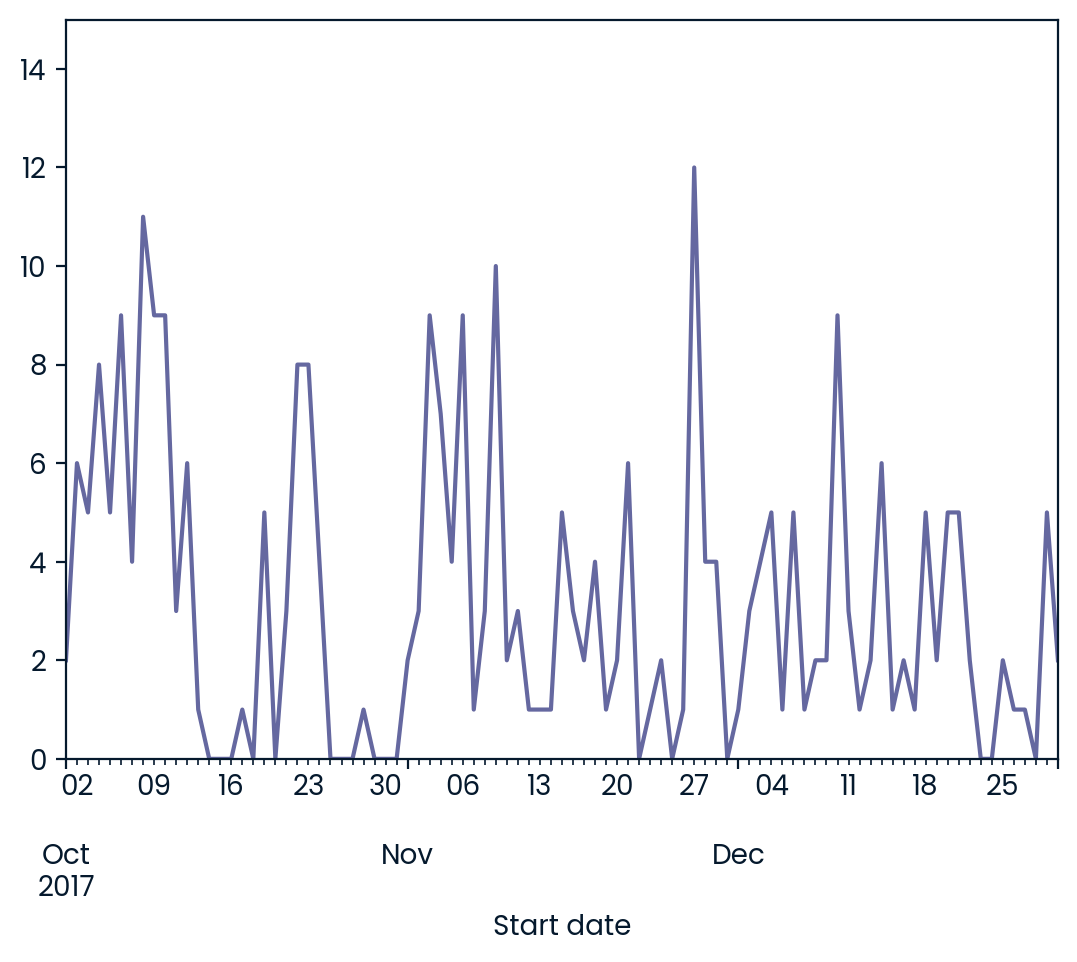

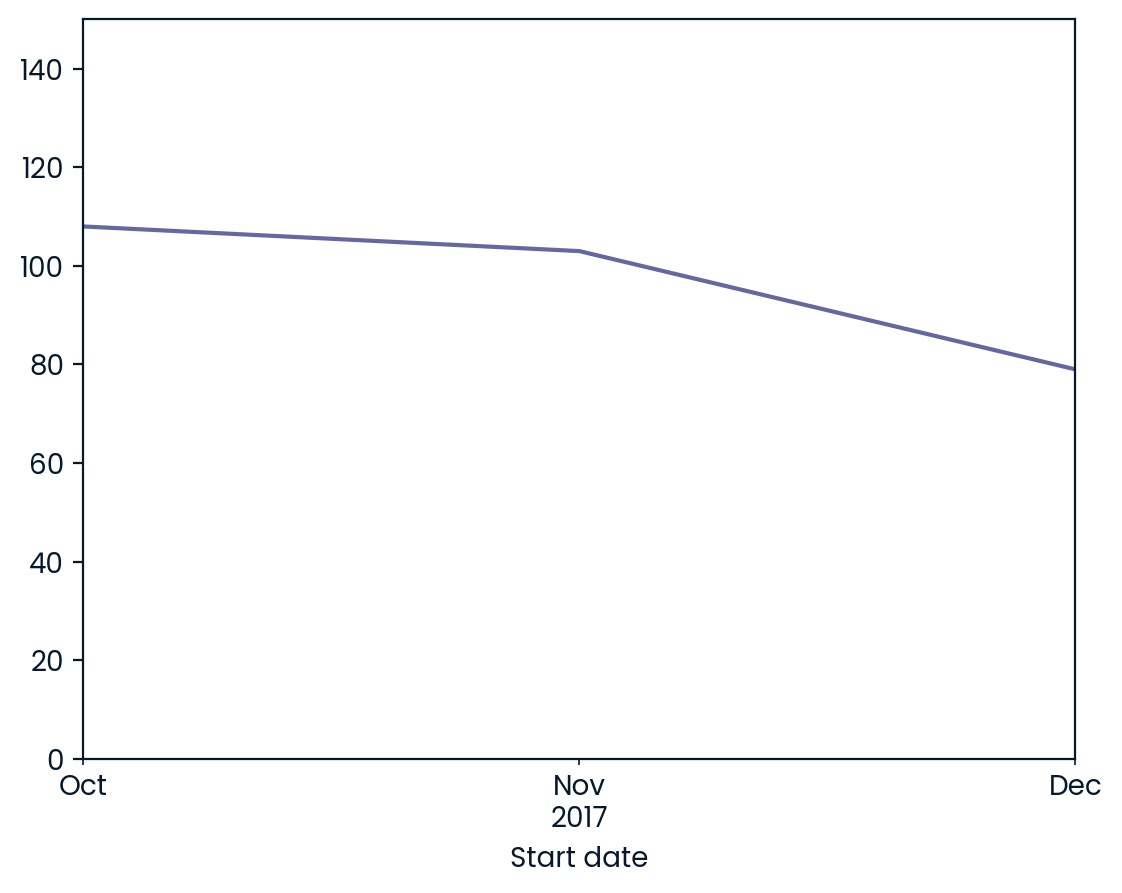

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64
Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64
2017-10-01 15:23:25-04:00
2017-10-01 20:23:25+01:00
Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64
Start date
2017-10-31 00:00:00+00:00    5.519242
2017-11-30 00:00:00+00:00    7.256474
2017-12-31 00:00:00+00:00    9.202380
Name: Time since, dtype: float64


In [6]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv('datasets/capital-onebike.csv', 
                    parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])

# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on = ('Start date'))['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = ('Start date'))

# Print the median duration for each group
print(grouped['Duration'].median())

# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date']\
.dt.tz_localize('America/New_York', ambiguous= 'NaT')

# Localize the End date column to America/New_York
rides['End date'] = rides['End date']\
.dt.tz_localize('America/New_York', ambiguous= 'NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Note that by default, .resample() labels Monthly resampling with the last day in the month and not the first. It certainly looks like the fraction of Casual riders went down as the number of rides dropped. With a little more digging, you could figure out if keeping Member rides only would be enough to stabilize the usage numbers throughout the fall.

It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by. Note that, by combining grouping and resampling, you can answer a lot of questions about nearly any data set that includes time as a feature. Keep in mind that you can also group by more than one column at once.

## Explore Datasets

Use the DataFrames imported in the first cell to explore the data and practice your skills!

- Count how many hurricanes made landfall each year in Florida using `florida_hurricane_dates`.
- Reload the dataset `datasets/capital-onebike.csv` so that it correctly parses date and time columns.
- Calculate the average trip duration of bike rentals on weekends in `rides`. Compare it with the average trip duration of bike rentals on weekdays.